# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [ ]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

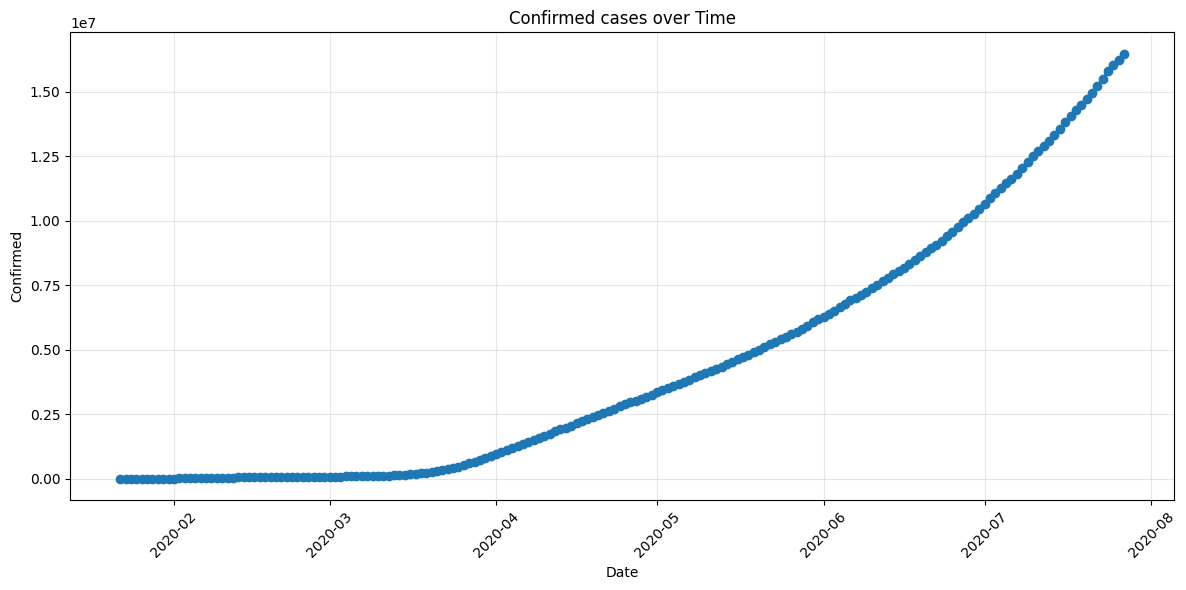

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# put your answer here
df["Date"] = pd.to_datetime(df["Date"])

agg = df.groupby("Date", as_index=False)["Confirmed"].sum()
agg.sort_values("Date")


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    agg["Date"],
    agg["Confirmed"],
    marker="o",
    linewidth=2
)

ax.set_title("Confirmed cases over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed")

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [ ]:
df.groupby("Country/Region", as_index=False)["Confirmed"].sum().sort_values("Confirmed")

,Country/Region,Confirmed
183,Western Sahara,901
130,Papua New Guinea,1185
75,Holy See,1356
68,Greenland,1507
140,Saint Kitts and Nevis,1772
...,...,...
157,Spain,27404045
79,India,40883464
138,Russia,45408411
23,Brazil,89524967


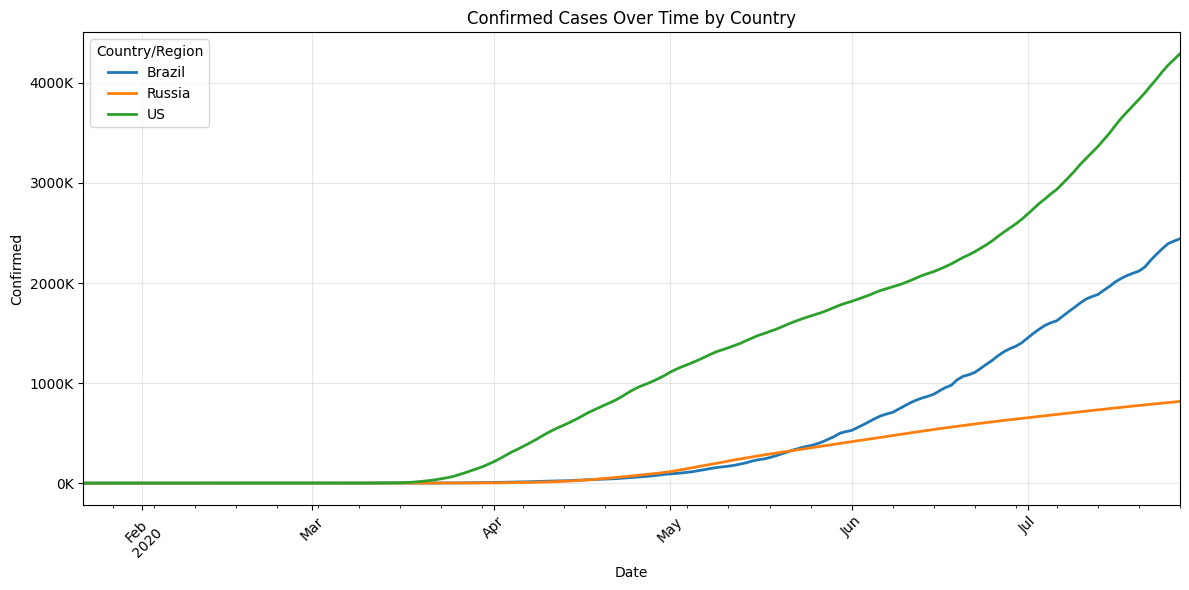

In [ ]:
# put your answer here
from matplotlib.ticker import FuncFormatter

countries = ["US", "Brazil", "Russia"]

filtered = df[df["Country/Region"].isin(countries)]

pivot = (
    filtered
    .groupby(["Date", "Country/Region"])["Confirmed"]
    .sum()
    .unstack("Country/Region")
)

fig, ax = plt.subplots(figsize=(12, 6))

pivot.plot(ax=ax, linewidth=2)

ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{x/1e3:.0f}K")
)

ax.set_title("Confirmed Cases Over Time by Country")
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed")

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

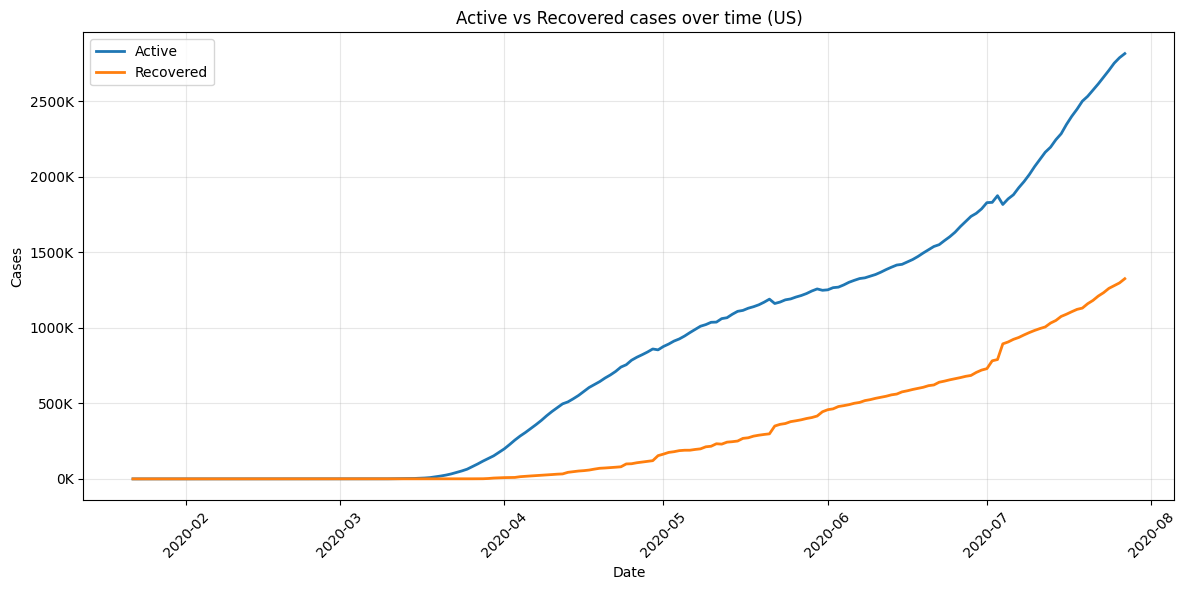

In [ ]:
# put your answer here
fig, ax = plt.subplots(figsize=(12, 6))

country_df = (
    df[df["Country/Region"] == "US"]
    .groupby("Date", as_index=False)[["Active", "Recovered"]]
    .sum()
    .sort_values("Date")
)

ax.plot(
    country_df["Date"],
    country_df["Active"],
    label="Active",
    linewidth=2
)

ax.plot(
    country_df["Date"],
    country_df["Recovered"],
    label="Recovered",
    linewidth=2
)

# Scale to thousands
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{x/1e3:.0f}K")
)

ax.set_title(f"Active vs Recovered cases over time (US)")
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

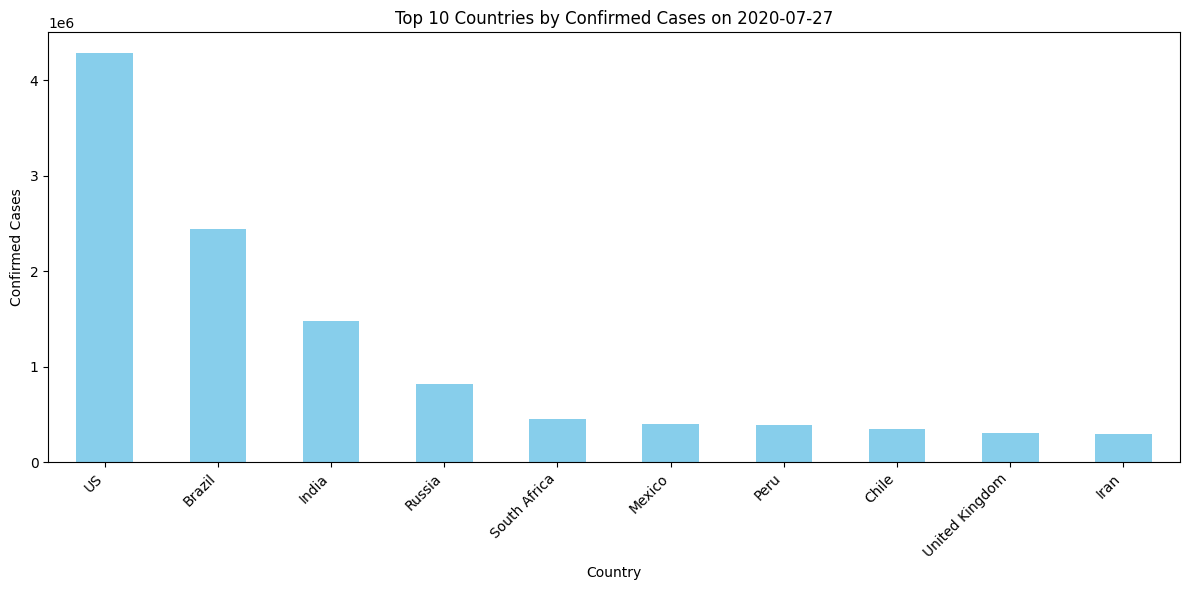

In [ ]:
import matplotlib.pyplot as plt

date = df[df["Date"] == "2020-07-27"]

to_bar = date.groupby("Country/Region")["Confirmed"].sum()

top10 = to_bar.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top10.plot(kind="bar", color="skyblue")

plt.title("Top 10 Countries by Confirmed Cases on 2020-07-27")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

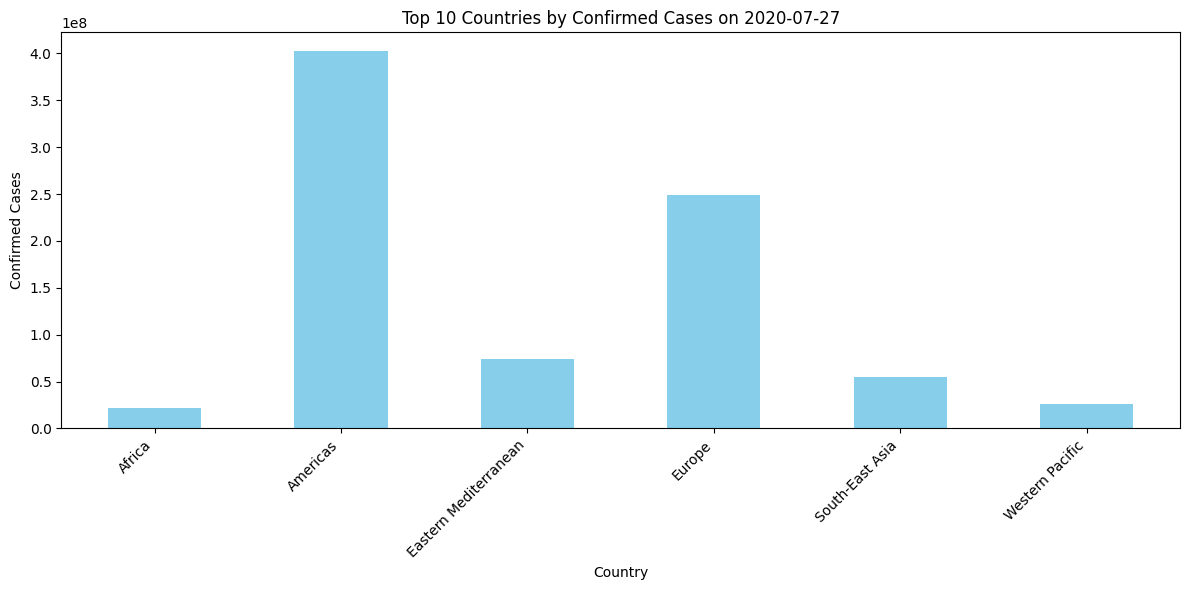

In [ ]:
# put your answer here
import matplotlib.pyplot as plt

to_bar = df.groupby("WHO Region")["Confirmed"].sum()

plt.figure(figsize=(12, 6))
to_bar.plot(kind="bar", color="skyblue")

plt.title("Top 10 Countries by Confirmed Cases on 2020-07-27")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Use Colab renderer
pio.renderers.default = "colab"

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Select the date to visualize
target_date = "2020-07-27"
df_date = df[df["Date"] == target_date]

# Aggregate by country + coordinates in case of multiple rows per country
agg = df_date.groupby(["Country/Region", "Lat", "Long"], as_index=False)["Confirmed"].sum()

# Create scatter map using latitude/longitude
fig = px.scatter_geo(
    agg,
    lat="Lat",
    lon="Long",
    size="Confirmed",           # Bubble size represents confirmed cases
    color="Confirmed",          # Bubble color represents confirmed cases
    hover_name="Country/Region",
    projection="natural earth",
    title=f"Confirmed COVID-19 Cases on {target_date}",
    color_continuous_scale="Viridis",
    size_max=40                 # Maximum bubble size
)

fig.show()


7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [ ]:
# put your answer here
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Select the date to visualize
target_who = "Americas"
df_who = df[df["WHO Region"] == target_who]

# Aggregate by country in case of multiple rows per country
agg = df_who.groupby("Country/Region", as_index=False)["Confirmed"].sum()

# Create choropleth
fig = px.choropleth(
    agg,
    locations="Country/Region",       # Use country names
    locationmode="country names",     # Map by country name
    color="Confirmed",                # Color by confirmed cases
    hover_name="Country/Region",      # Show country on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title=f"Confirmed COVID-19 Cases on {target_who}"
)

fig.show()